## **Title:Amazon Product Review Analysis**

### **Business Objective:Customer Retention and Sentiment Forecasting**.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #importing required libraries
import numpy as np                                              #for array and numerical data calculation
import pandas as pd                                             #for making dataframe and loding data
import matplotlib.pyplot as plt                                 #for visualization
import seaborn as sns                                           #for visualization
sns.set()


from statsmodels.tsa.seasonal import seasonal_decompose         #for decompostion of plot into trend,seasonality and residual
from statsmodels.tsa.stattools import acf,pacf,adfuller         #for plotting acf plot,pacf plot and checking stationarity through Augmented dickey fuller test
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA                   #for building ARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX          #for building SARIMAX model if seasonality is presnt in data
import statsmodels.api as sm


import warnings                                                  # to filter out warnings
warnings.simplefilter(action='ignore')

In [ ]:
## Reading the preprocessed data
pantry_bkp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clean_data_finall.zip',compression='zip',parse_dates=['Date'])
pantry_bkp.head()

,rating,verified,Date,reviewerID,asin,reviewerName,unixReviewTime,description,title,also_buy,brand,feature,rank,also_view,price,review_text,clean_text,Polarity,Analysis
0,4,True,2015-09-24,A31Y9ELLA1JUB0,B0000DIWNI,Her Royal Peepness Princess HoneyBunny Blayze,1443052800,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Pretty Good For plastic Wrap I purchased this ...,pretty good plastic wrap purchase saran premiu...,0.187037,Neutral
1,5,True,2015-06-23,A2FYW9VZ0AMXKY,B0000DIWNI,Mary,1435017600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"The Best Plastic Wrap for your Cooking, Baking...",best plastic wrap cook bake food storage need ...,0.317857,Neutral
2,5,True,2015-06-13,A1NE43T0OM6NNX,B0000DIWNI,Tulay C,1434153600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,"Good and strong. Good wrap, keeping it in the ...",good strong good wrap keep fridge make easier ...,0.611111,Positive
3,4,True,2015-06-03,AHTCPGK2CNPKU,B0000DIWNI,OmaShops,1433289600,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Doesn't cling as well to dishes as other brand...,doesn t cling dish brand tangle prefer saran w...,0.000000,Negative
4,5,True,2015-04-20,A25SIBTMVXLB59,B0000DIWNI,Nitemanslim,1429488000,['Saran Premium Wrap is an extra tough yet eas...,"Saran Premium Plastic Wrap, 100 Sq Ft","['B01MY5FHT6', 'B000PYF8VM', 'B000SRMDFA', 'B0...",Saran,[],[],"['B077QLSLRQ', 'B00JPKW1RQ', 'B000FE2IK6', 'B0...",1.48,Five Stars Thanks,star thank,0.000000,Negative


In [ ]:
#Dropping if null value exist
pantry_bkp.dropna(inplace=True)

In [ ]:
#checking for null values
pantry_bkp.isnull().sum()

rating            0
verified          0
Date              0
reviewerID        0
asin              0
reviewerName      0
unixReviewTime    0
description       0
title             0
also_buy          0
brand             0
feature           0
rank              0
also_view         0
price             0
review_text       0
clean_text        0
Polarity          0
Analysis          0
dtype: int64

In [ ]:
#Unstacking Analysis column into separate columns
#resampling data quaterly as the data is huge
pantry_dff=pd.crosstab(pantry_bkp['Date'],pantry_bkp['Analysis'])
pantry_dff=pantry_dff.resample('Q').sum()
pantry_dff['total']=pantry_dff['Negative']+pantry_dff['Neutral']+pantry_dff['Positive']

pantry_dff.head()

Analysis,Negative,Neutral,Positive,total
Date,,,,
2006-06-30,0,3,0,3
2006-09-30,0,2,0,2
2006-12-31,0,3,0,3
2007-03-31,0,0,1,1
2007-06-30,0,0,0,0


In [ ]:
#Slicing the required data for analysis as before it all datapoints have constant or zero values.
Positive=pantry_dff['Positive'][27:]
Neutral=pantry_dff['Neutral'][27:]
Negative=pantry_dff['Negative'][27:]

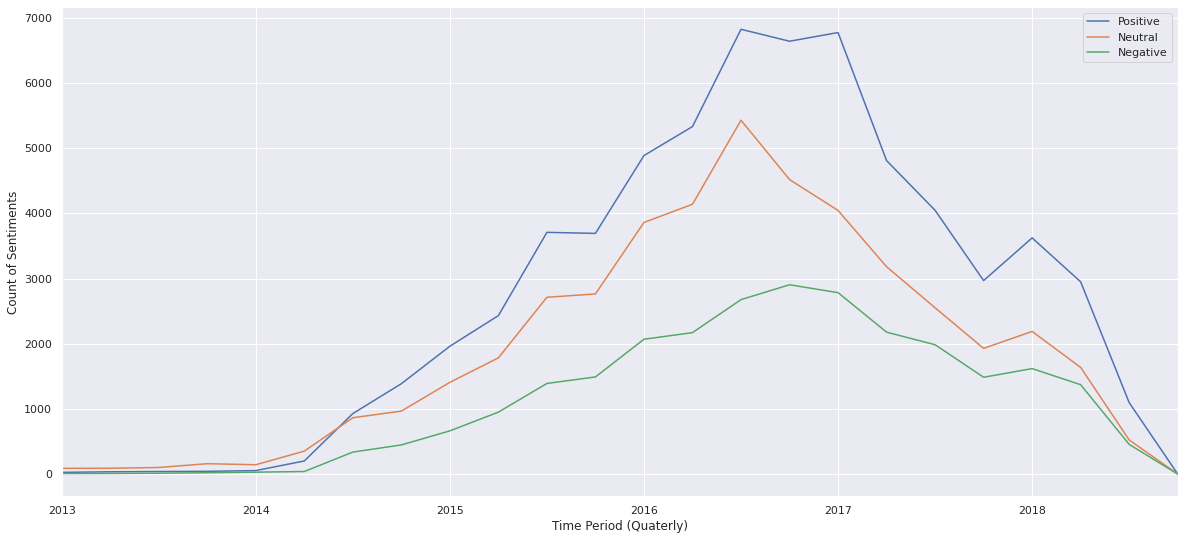

In [ ]:
#seeing plot of Analysis Column
for i in [Positive,Neutral,Negative]:
  i.plot(figsize=(20,9))
  plt.xlabel('Time Period (Quaterly)')
  plt.ylabel('Count of Sentiments')
  plt.legend();

We can see all types of sentiment are gradually decreasing after 2016 and going upto 2018

### Positive Sentiment Customer Shopping Pattern and Review Time Series Analysis.

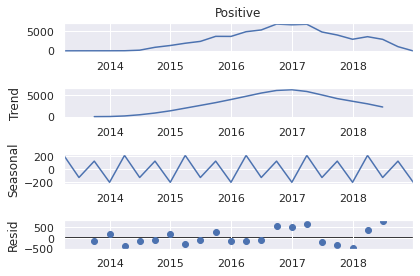

In [ ]:
#seasonal decomposition for positive sentiment,period=4 as there are 4 months in each qaurter
decomposition=seasonal_decompose(Positive,period=4)
decomposition.plot();

We can see trend and seasonality as well as noise points in our data.

In [ ]:
#decomposition for trend ,seasonality and residual
d_trend_p   =decomposition.trend
d_seasonal_p=decomposition.seasonal
d_residual_p=decomposition.resid

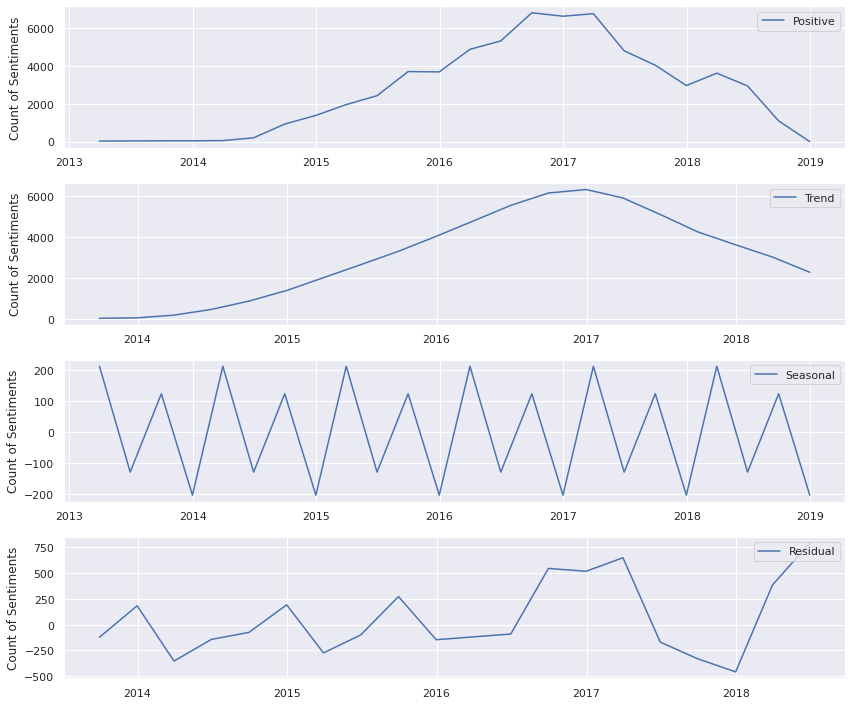

In [ ]:
#plotting the graphs
fig,ax=plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(Positive,label='Positive')
ax[0].set_ylabel('Count of Sentiments')
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_p,label='Trend')
ax[1].set_ylabel('Count of Sentiments')
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_p,label='Seasonal')
ax[2].set_ylabel('Count of Sentiments')
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_p,label='Residual')
ax[3].set_ylabel('Count of Sentiments')
ax[3].legend(loc='upper right')
           
plt.tight_layout()

In [ ]:
# dickey-fuller test for stationarity
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    if pvalue < 0.05:
        ret = "Data is Stationary. Proceed to model building"
    else:
        ret = "Data is not Stationary. Make it stationary"
        
    return(ret)

In [ ]:
# checking for stationarity of the positive sentiment data

checkStationarity(Positive)

'Data is Stationary. Proceed to model building'

As it is already stationary so we take d=0

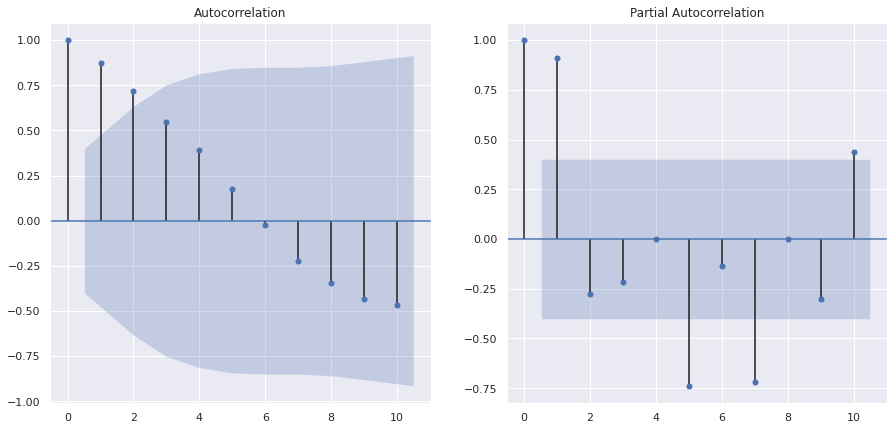

In [ ]:
#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(Positive,lags=10,ax=ax[0])
plot_pacf(Positive,lags=10,ax=ax[1])
plt.show()

Positive sentiment data p,d,q values
* p=[0,1]
* d=0
* q=[0,1,2]

In [ ]:
checkStationarity(d_seasonal_p)

'Data is Stationary. Proceed to model building'

As there is seasonality in data we go for SARIMAX model so will find P,D,Q values.

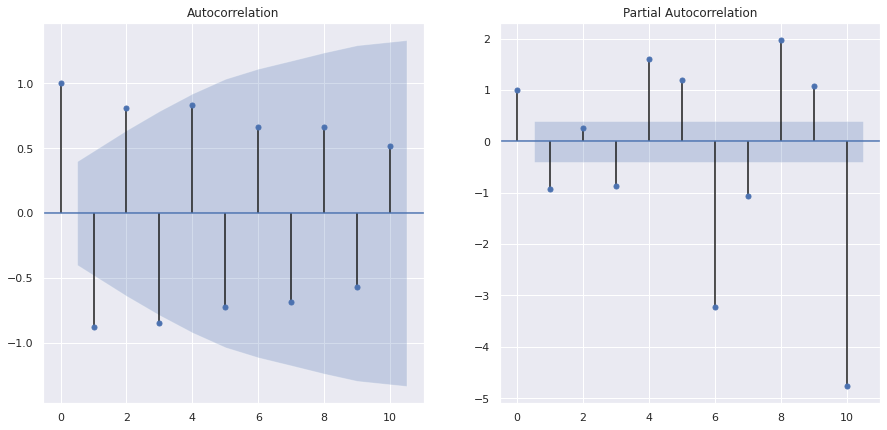

In [ ]:
#plotting correlogram for seasonality
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_p,lags=10,ax=ax[0])
plot_pacf(d_seasonal_p,lags=10,ax=ax[1])
plt.show()

Positive sentiment data P,D,Q values
* P=[0,1]
* D=0
* Q=[0,1,2]


In [ ]:
# Splitting the data into train and test by row indexing
ss=int(len(Positive)*0.70)
train_pos=Positive[:ss]
test_pos=Positive[ss:]

* p=[0,1]
* d=0
* q=[0,1,2]
* P=[0,1]
* D=0
* Q=[0,1,2]

In [ ]:
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
  for j in range(3):
    for k in range(2):
      for l in range(3):
        sarima_pos=SARIMAX(Positive,order=(i,0,j),seasonal_order=(k,0,l,4),enforce_stationarity=False).fit()
        p.append(i)
        q.append(j)
        P.append(k)
        Q.append(l)
        aic.append(sarima_pos.aic)

In [ ]:
df=pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df.sort_values(by=['AIC'],ascending=True).head()

,p,q,P,Q,AIC
32,1,2,0,2,221.144916
35,1,2,1,2,222.556143
14,0,2,0,2,227.318174
17,0,2,1,2,228.425169
26,1,1,0,2,239.514289


In [ ]:
# defining the model for Time series analysis plot
def TSAplots(data=Positive,train=train_pos,test=test_pos,p=1,d=0,q=2,P=0,Q=2,D=0,title="Trend of Positive Sentiment Count Prime Pantry"):
    global m2_pos
    m2_pos=SARIMAX(train,order=(p,d,q),seasonal_order=(P,D,Q,4)).fit()
    f2_pos=m2_pos.forecast(len(test))
    new_model_pos=SARIMAX(data,order=(p,d,q),seasonal_order=(P,D,Q,4)).fit()
    fc_pos=new_model_pos.forecast(10)
    plt.subplots(figsize=(12,8))
    plt.plot(data,color='orange',label='Actual')
    plt.plot(fc_pos.combine_first(data[:-2:-1]),color='green',label='Forecast') #Combine two DataFrame objects by filling null values in one DataFrame with non-null 
    plt.plot(f2_pos,color='blue',label='Predicted')                        #values from other DataFrame
    plt.title(title,fontsize=14)
    plt.xlabel('Time Period (Quaterly)',fontsize=12)
    plt.ylabel('Count of Sentiment',fontsize=12)
    plt.legend(loc='left')
    # actual=[]
    # pred  =[]

    # for i in range(len(f2_pos)):
    #  actual.append(test[i])
    #  pred.append(f2_pos[i])
    # df_resd=pd.DataFrame({'Actual':actual,'Prediction':pred})
    # df_resd['Error']=df_resd.Actual - df_resd.Prediction
    # df_resd.Error.plot()

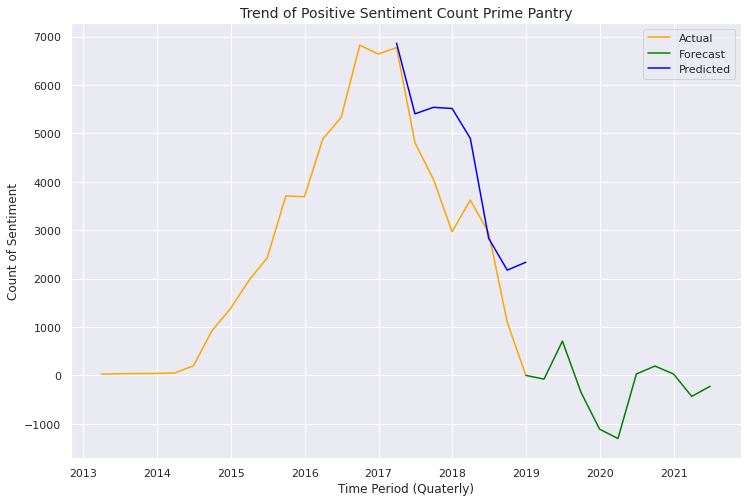

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast 
TSAplots(data=Positive,train=train_pos,test=test_pos,p=0,d=0,q=2,P=0,Q=2,D=0,title="Trend of Positive Sentiment Count Prime Pantry")

From the plot we can say that the positive sentiments of customers will decrease till 2020 and after that it will increase,as per shopping habits of people.


In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [ ]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Positive   No. Observations:                   16
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 4)   Log Likelihood                -133.446
Date:                           Thu, 02 Feb 2023   AIC                            276.892
Time:                                   18:41:57   BIC                            280.755
Sample:                               03-31-2013   HQIC                           277.089
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.4253      2.353      0.606      0.545      -3.186       6.037
ma.L2          0.8784      2.989      0.294      0.769      -4.981       6.737
ma.S.L4        1.4926      2.116      0.705      0.481      -2.656       5.641
ma.S.L8        0.9988      3.150      0.317      0.751      -5.175       7.173
sigma2      3.164e+05   1.46e-05   2.16e+10      0.000    3.16e+05    3.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.48   Jarque-Bera (JB):                 1.66
Prob(Q):                              0.22   Prob(JB):                         0.44
Heteroskedasticity (H):           14829.65   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.26e+27. Standard errors may be unstable.
"""

### Neutral Sentiment Customer Shopping Pattern and Review Time Series Analysis.

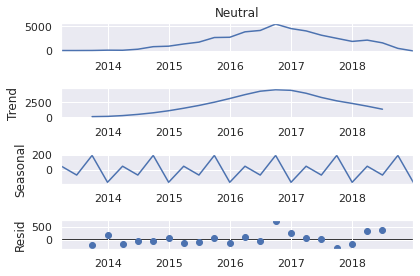

In [ ]:
#seasonal decomposition for neutral sentiment,period=4 as there are 4 months in each qaurter
decomposition=seasonal_decompose(Neutral,period=4)
decomposition.plot();

We can see trend and seasonality as well as noise points in our data.

In [ ]:
#decomposition for trend ,seasonality and residual
d_trend_neu=decomposition.trend
d_seasonal_neu=decomposition.seasonal
d_residual_neu=decomposition.resid

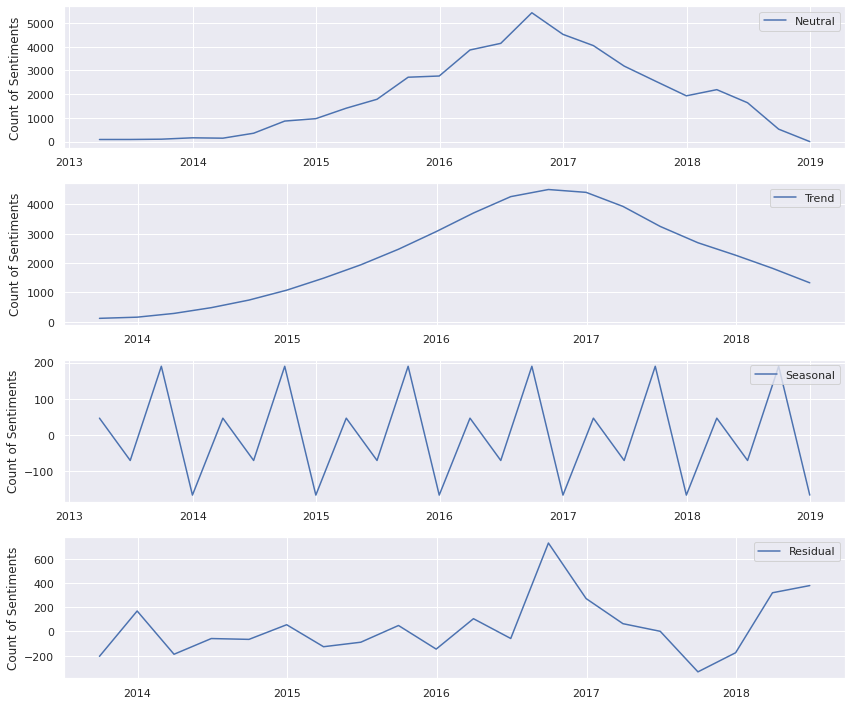

In [ ]:
#plotting the graphs
fig,ax=plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(Neutral,label='Neutral')
ax[0].set_ylabel('Count of Sentiments')
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_neu,label='Trend')
ax[1].set_ylabel('Count of Sentiments')
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_neu,label='Seasonal')
ax[2].set_ylabel('Count of Sentiments')
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_neu,label='Residual')
ax[3].set_ylabel('Count of Sentiments')
ax[3].legend(loc='upper right')
           
plt.tight_layout()

In [ ]:
# checking for stationarity of the neutral sentiment data
checkStationarity(Neutral.diff(4)[4:])

'Data is Stationary. Proceed to model building'

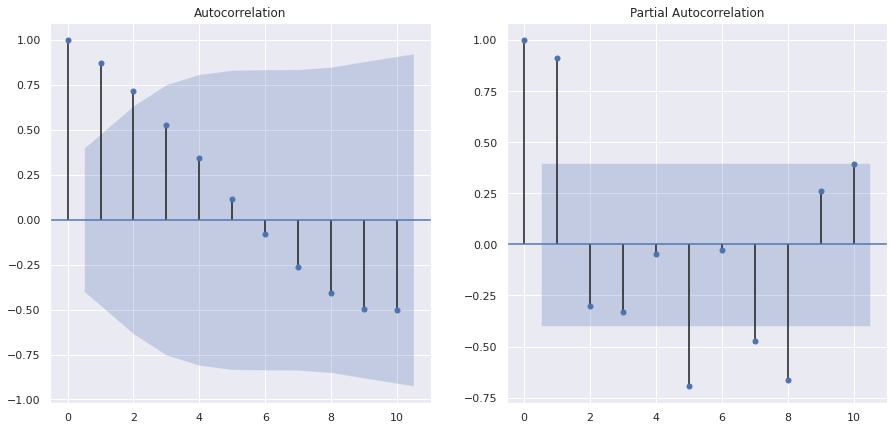

In [ ]:
#plotting correlogram for neutral sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(Neutral,lags=10,ax=ax[0])
plot_pacf(Neutral,lags=10,ax=ax[1])
plt.show()

Neutral sentiment data p,d,q values
* p=[0,1]
* d=4
* q=[0,1,2]

In [ ]:
checkStationarity(d_seasonal_neu)

'Data is Stationary. Proceed to model building'

As there is seasonality in data we go for SARIMAX model so will find P,D,Q values.

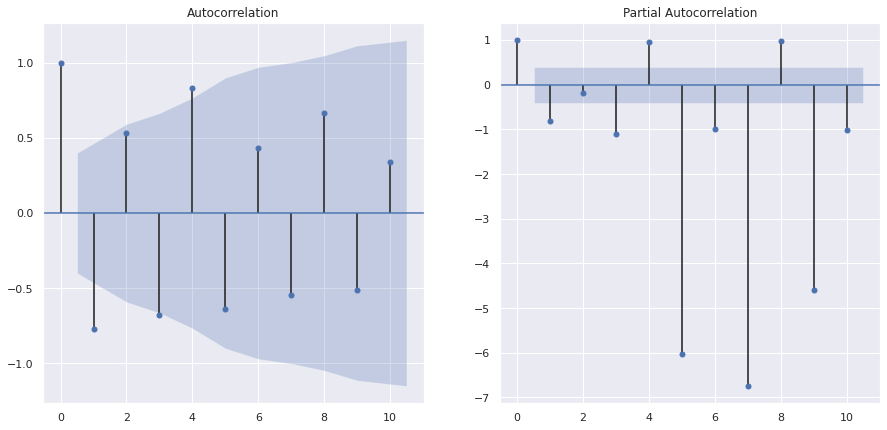

In [ ]:
#plotting correlogram for seasonality
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_neu,lags=10,ax=ax[0])
plot_pacf(d_seasonal_neu,lags=10,ax=ax[1])
plt.show()

Neutral sentiment data P,D,Q values
* P=[0,1,2]
* D=0
* Q=[0,1,2]


In [ ]:
# Splitting the data into train and test by row indexing
ss=int(len(Neutral)*0.70)
train_neu=Neutral[:ss]
test_neu=Neutral[ss:]

* p=[0,1]
* d=4
* q=[0,1,2]
* P=[0,1,2]
* D=0
* Q=[0,1,2]

In [ ]:
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(2):
  for j in range(3):
    for k in range(2):
      for l in range(3):
        sarima_neu=SARIMAX(Neutral,order=(i,4,j),seasonal_order=(k,0,l,4),enforce_stationarity=False).fit()
        p.append(i)
        q.append(j)
        P.append(k)
        Q.append(l)
        aic.append(sarima_neu.aic)

In [ ]:
df=pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df.sort_values(by='AIC',ascending=True).head()

,p,q,P,Q,AIC
14,0,2,0,2,158.042808
17,0,2,1,2,158.376535
32,1,2,0,2,159.790948
35,1,2,1,2,161.815118
26,1,1,0,2,176.791824


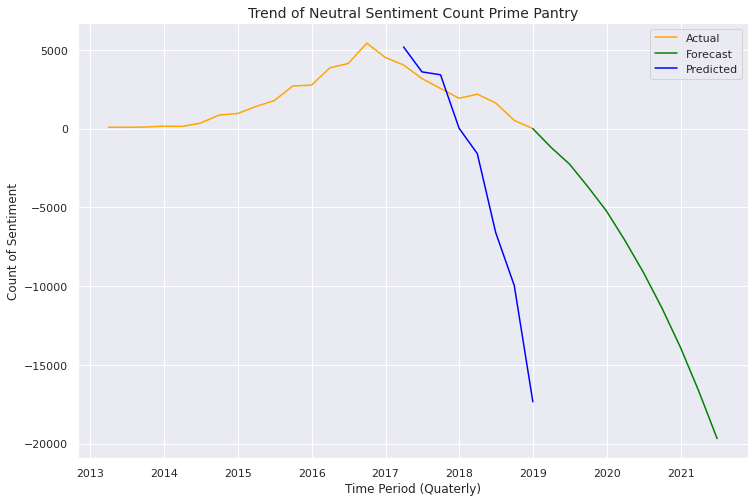

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast 
TSAplots(data=Neutral,train=train_neu,test=test_neu,p=1,d=4,q=2,P=0,Q=2,D=0,title="Trend of Neutral Sentiment Count Prime Pantry")

From the plot we can say that the neutral  sentiments of customers will gradually decrease ,as per shopping habits of people.

We have taken 3rd choice of p,q,P and Q as above three were not able to pass Ljung-box test.

In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [ ]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                           Neutral   No. Observations:                   16
Model:             SARIMAX(1, 4, 2)x(0, 0, 2, 4)   Log Likelihood                 -89.009
Date:                           Thu, 02 Feb 2023   AIC                            190.018
Time:                                   18:43:04   BIC                            192.927
Sample:                               03-31-2013   HQIC                           188.941
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.426     -2.348      0.019      -1.835      -0.165
ma.L1         -1.2603   1674.606     -0.001      0.999   -3283.427    3280.906
ma.L2          0.2605    432.632      0.001      1.000    -847.682     848.203
ma.S.L4        1.0855    909.382      0.001      0.999   -1781.270    1783.441
ma.S.L8        0.9997   1675.399      0.001      1.000   -3282.722    3284.721
sigma2      7.642e+04      0.033   2.32e+06      0.000    7.64e+04    7.64e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.69
Prob(Q):                              0.72   Prob(JB):                         0.43
Heteroskedasticity (H):               2.98   Skew:                            -0.91
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.6e+25. Standard errors may be unstable.
"""

### Negative Sentiment Customer Shopping Pattern and Review Time Series Analysis.

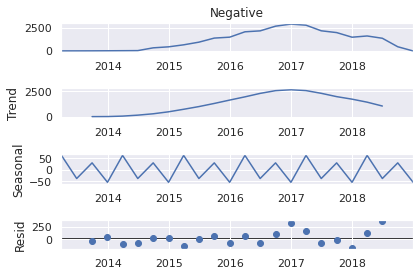

In [ ]:
#seasonal decomposition for negative sentiment,period=4 as there are 4 months in each qaurter
decomposition=seasonal_decompose(Negative,period=4)
decomposition.plot();

We can see trend and seasonality as well as noise points in our data.

In [ ]:
#decomposition for trend ,seasonality and residual
d_trend_neg=decomposition.trend
d_seasonal_neg=decomposition.seasonal
d_residual_neg=decomposition.resid

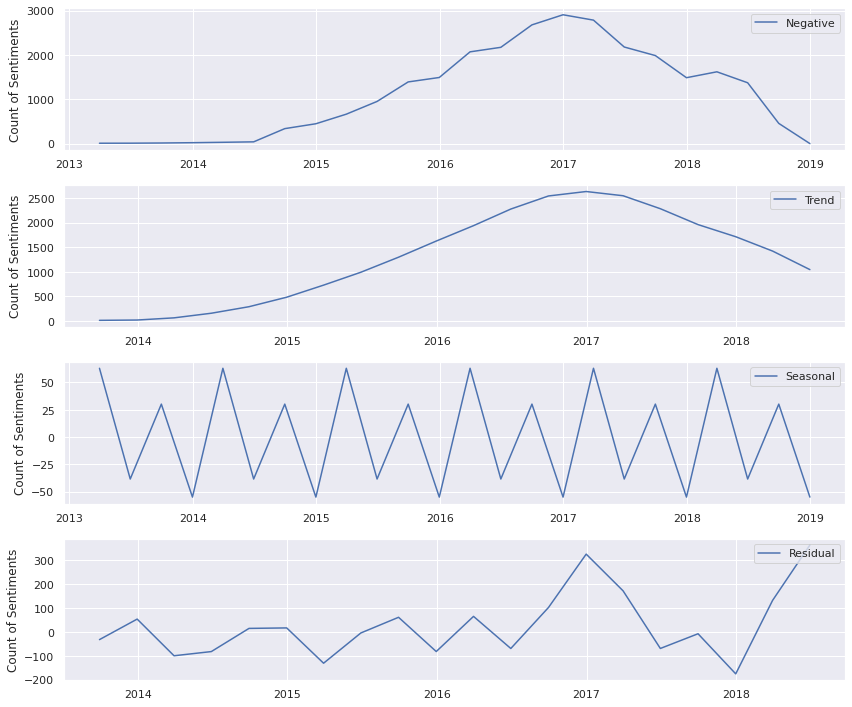

In [ ]:
#plotting the graphs
fig,ax=plt.subplots(4,1,figsize=(12,10))

#Original Data Graph:
ax[0].plot(Negative,label='Negative')
ax[0].set_ylabel('Count of Sentiments')
ax[0].legend(loc='best')

#Trend 
ax[1].plot(d_trend_neg,label='Trend')
ax[1].set_ylabel('Count of Sentiments')
ax[1].legend(loc='best')

#Seasonality
ax[2].plot(d_seasonal_neg,label='Seasonal')
ax[2].set_ylabel('Count of Sentiments')
ax[2].legend(loc='upper right')

#Residual/Irregular
ax[3].plot(d_residual_neg,label='Residual')
ax[3].set_ylabel('Count of Sentiments')
ax[3].legend(loc='upper right')
           
plt.tight_layout()

In [ ]:
# checking for stationarity of the negative sentiment data
checkStationarity(Negative)

'Data is Stationary. Proceed to model building'

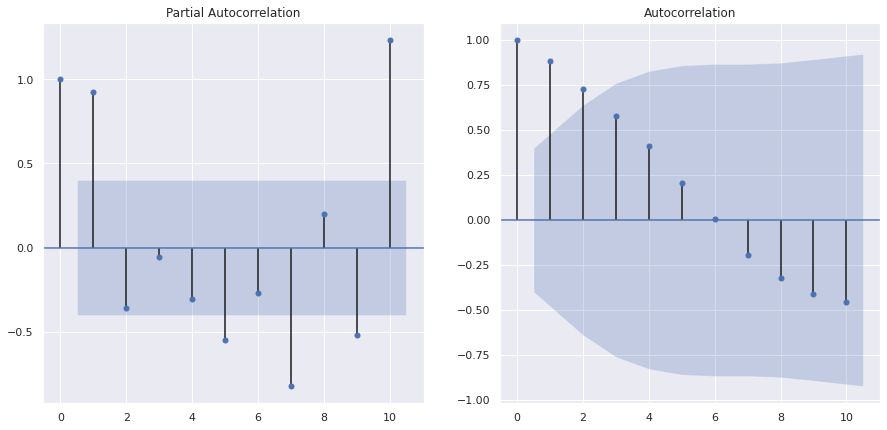

In [ ]:
#plotting correlogram for positive sentiment data
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(Negative,lags=10,ax=ax[1])
plot_pacf(Negative,lags=10,ax=ax[0])
plt.show()

Neutral sentiment data p,d,q values

* p=[0,1,2]
* d=0
* q=[0,1,2]

In [ ]:
checkStationarity(d_seasonal_neg)

'Data is Stationary. Proceed to model building'

As there is seasonality in data we go for SARIMAX model so will find P,D,Q values.

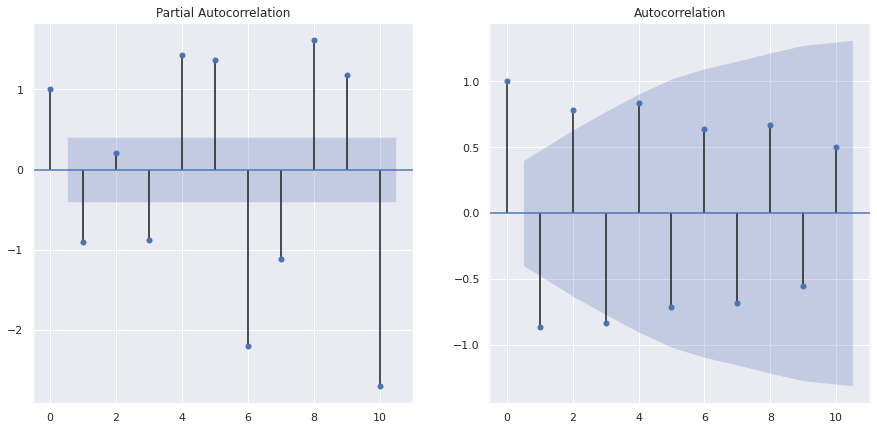

In [ ]:
#plotting correlogram for seasonality
fig,ax=plt.subplots(1,2,figsize=(15,7))
plot_acf(d_seasonal_neg,lags=10,ax=ax[1])
plot_pacf(d_seasonal_neg,lags=10,ax=ax[0])
plt.show()

Neutral sentiment data P,D,Q values
* P=[0,1]
* D=0
* Q=[0,1,2,3]

In [ ]:
# Splitting the data into train and test by row indexing
ss=int(len(Negative)*0.70)
train_neg=Negative[:ss]
test_neg=Negative[ss:]

* p=[0,1,2]
* d=0
* q=[0,1,2]
* P=[0,1]
* D=0
* Q=[0,1,2,3]

In [ ]:
p=[]
q=[]
P=[]
Q=[]
aic=[]
for i in range(3):
  for j in range(3):
    for k in range(2):
      for l in range(4):
        sarima_neg=SARIMAX(Negative,order=(i,0,j),seasonal_order=(k,0,l,4),enforce_stationarity=False).fit()
        p.append(i)
        q.append(j)
        P.append(k)
        Q.append(l)
        aic.append(sarima_neg.aic)

In [ ]:
df=pd.DataFrame({"p":p,"q":q,"P":P,"Q":Q,"AIC":aic})
df.sort_values(by='AIC',ascending=True).head()

,p,q,P,Q,AIC
67,2,2,0,3,143.863235
43,1,2,0,3,143.938955
47,1,2,1,3,144.981551
71,2,2,1,3,145.694613
23,0,2,1,3,147.789784


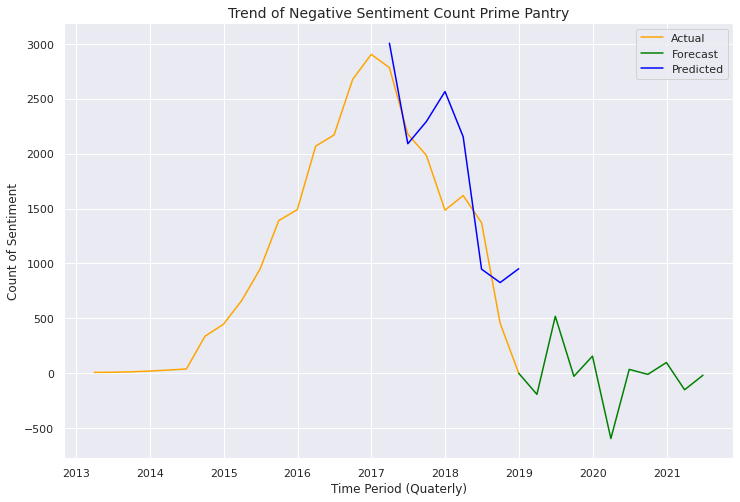

In [ ]:
# Time Series Analysis plot for Actual,Predicted and Forecast 
TSAplots(data=Negative,train=train_neg,test=test_neg,p=0,d=0,q=2,P=1,Q=3,D=0,title="Trend of Negative Sentiment Count Prime Pantry")

From the plot we can say that the neagtive sentiments of customers will decrease till 2020 and after that it will slightly increase,as per shopping habits of people.

In [ ]:
#perform Ljung-box test
pvalue = sm.stats.acorr_ljungbox(m2_pos.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [ ]:
#Summary of SARIMAX model
m2_pos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                                  Negative   No. Observations:                   16
Model:             SARIMAX(0, 0, 2)x(1, 0, [1, 2, 3], 4)   Log Likelihood                -119.854
Date:                                   Thu, 02 Feb 2023   AIC                            253.707
Time:                                           18:44:28   BIC                            259.115
Sample:                                       03-31-2013   HQIC                           253.984
                                            - 12-31-2016                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.6254    140.998      0.012      0.991    -274.725     277.976
ma.L2          0.9937    173.236      0.006      0.995    -338.542     340.529
ar.S.L4        0.9978      3.273      0.305      0.760      -5.417       7.413
ma.S.L4        0.6727   3350.058      0.000      1.000   -6565.321    6566.666
ma.S.L8       -0.6740   3337.561     -0.000      1.000   -6542.174    6540.826
ma.S.L12      -0.9987    177.331     -0.006      0.996    -348.561     346.563
sigma2       4.75e+04      0.188   2.53e+05      0.000    4.75e+04    4.75e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.74   Prob(JB):                         0.19
Heteroskedasticity (H):           10760.98   Skew:                             1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.51e+24. Standard errors may be unstable.
"""

In [ ]:
#For customer retention and churn out counting frequenc of purchase
purchase_1st=pantry_bkp.groupby('reviewerID')[['Date']].min().reset_index()

purchase_2nd=pantry_bkp.groupby('reviewerID')[['Date']].max().reset_index()

In [ ]:
#Count of reviewerID will give total number of times the person do shopping
frequency=pantry_bkp.groupby(['reviewerID','reviewerName','Analysis'])['reviewerID'].count()
frequency=pd.DataFrame(frequency)
frequency

reviewerID
reviewerID           reviewerName    Analysis            
A0526222H977CBZM4DK7 JAIME SCARPITTA Negative           1
                                     Positive           4
A09677047K94TJDE6FN3 Amazon Customer Negative           1
                                     Neutral            2
                                     Positive           3
...                                                   ...
AZZT1ERHBSNQ8        jbird           Negative           1
                                     Neutral            2
                                     Positive           2
AZZTYBMA9JHTC        Leslie          Negative           4
                                     Positive           1

[32884 rows x 1 columns]

In [ ]:
#Renaming reviewerID as count of shopping
frequency.rename(columns={'reviewerID':'Count_shopping'},inplace=True)
frequency.reset_index(inplace=True)

In [ ]:
frequency_shop=pd.merge(purchase_1st,purchase_2nd,on=['reviewerID'])
frequency_shop=pd.merge(frequency_shop,frequency,on=['reviewerID'])

In [ ]:
#Taking difference of the person shopping 1st time to last time to get how frequent he/she buys product
frequency_shop['Differnce']=frequency_shop['Date_y']-frequency_shop['Date_x']
frequency_shop

,reviewerID,Date_x,Date_y,reviewerName,Analysis,Count_shopping,Differnce
0,A0526222H977CBZM4DK7,2016-10-16,2017-04-26,JAIME SCARPITTA,Negative,1,192 days
1,A0526222H977CBZM4DK7,2016-10-16,2017-04-26,JAIME SCARPITTA,Positive,4,192 days
2,A09677047K94TJDE6FN3,2018-04-03,2018-04-03,Amazon Customer,Negative,1,0 days
3,A09677047K94TJDE6FN3,2018-04-03,2018-04-03,Amazon Customer,Neutral,2,0 days
4,A09677047K94TJDE6FN3,2018-04-03,2018-04-03,Amazon Customer,Positive,3,0 days
...,...,...,...,...,...,...,...
32879,AZZT1ERHBSNQ8,2016-12-10,2017-07-22,jbird,Negative,1,224 days
32880,AZZT1ERHBSNQ8,2016-12-10,2017-07-22,jbird,Neutral,2,224 days
32881,AZZT1ERHBSNQ8,2016-12-10,2017-07-22,jbird,Positive,2,224 days
32882,AZZTYBMA9JHTC,2016-10-01,2016-10-01,Leslie,Negative,4,0 days


In [ ]:
#filtering the customers who have shopped atleast twice on amazon
shop_tworm=frequency_shop[frequency_shop['Differnce']!='0 days']
shop_tworm['freq_time']=shop_tworm['Differnce']/shop_tworm['Count_shopping']
shop_tworm.sort_values(by='Count_shopping',ascending=False)

,reviewerID,Date_x,Date_y,reviewerName,Analysis,Count_shopping,Differnce,freq_time
18842,A35Q0RBM3YNQNF,2015-08-18,2018-09-01,M. Hill,Neutral,168,1110 days,6 days 14:34:17.142857142
29907,ANDVNCX6JU4XW,2016-06-13,2016-07-26,SHERRY MCCAUGHTRY,Positive,124,43 days,0 days 08:19:21.290322580
765,A13J2PGKNMJG1K,2014-07-05,2018-03-21,LegoGirl,Neutral,118,1355 days,11 days 11:35:35.593220338
29752,AMMNGUJK4HQJ5,2014-08-27,2018-07-19,Misty,Neutral,116,1422 days,12 days 06:12:24.827586206
10362,A26K3T6L5NYO7L,2015-02-02,2018-02-18,PennyPincher,Neutral,111,1112 days,10 days 00:25:56.756756756
...,...,...,...,...,...,...,...,...
27392,AD2NC12BXWG46,2015-12-25,2017-08-01,Jillian Fae,Positive,1,585 days,585 days 00:00:00
10294,A26CIDCRYQLUL6,2014-08-24,2017-03-05,Richard,Negative,1,924 days,924 days 00:00:00
10297,A26CIDCRYQLUL6,2014-08-24,2017-03-05,Rickie,Neutral,1,924 days,924 days 00:00:00
10308,A26E1C9KL8LFPL,2016-12-09,2018-04-27,pepper,Negative,1,504 days,504 days 00:00:00


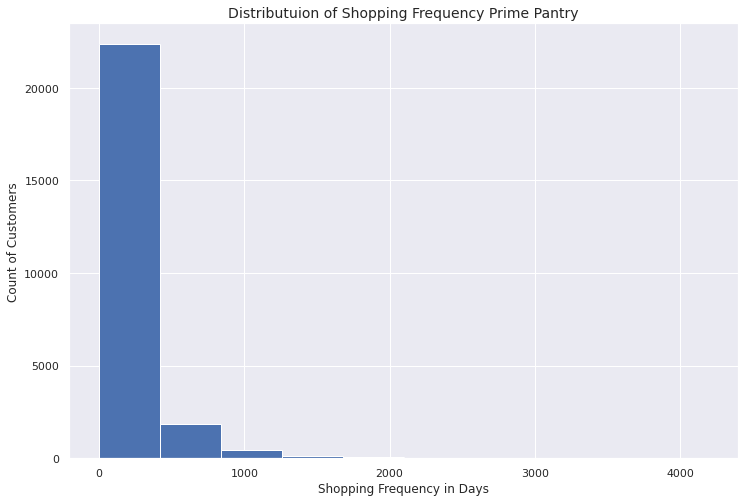

In [ ]:
#Distribution of purchase frequency
fig=plt.figure(figsize=(12,8))
plt.hist(shop_tworm['freq_time'].apply(lambda x:x.days))
plt.ylabel('Count of Customers',fontsize=12)
plt.xlabel('Shopping Frequency in Days',fontsize=12)
plt.title('Distributuion of Shopping Frequency Prime Pantry',fontsize=14)
plt.show()

### Loyal Customers

In [ ]:
#Top 20 customer who shop more frequently 
shop_tworm.iloc[:,[0,3,4,-3,-1]].sort_values(by='Count_shopping',ascending=False).head(20)

,reviewerID,reviewerName,Analysis,Count_shopping,freq_time
18842,A35Q0RBM3YNQNF,M. Hill,Neutral,168,6 days 14:34:17.142857142
29907,ANDVNCX6JU4XW,SHERRY MCCAUGHTRY,Positive,124,0 days 08:19:21.290322580
765,A13J2PGKNMJG1K,LegoGirl,Neutral,118,11 days 11:35:35.593220338
29752,AMMNGUJK4HQJ5,Misty,Neutral,116,12 days 06:12:24.827586206
10362,A26K3T6L5NYO7L,PennyPincher,Neutral,111,10 days 00:25:56.756756756
10066,A25DP3DWUXSS48,KT,Neutral,93,11 days 22:27:05.806451612
17185,A2YKWYC3WQJX5J,ShannonOnTheLakes,Neutral,79,44 days 09:43:17.468354430
29271,AKPG8VQBS0MWR,Old Coast Customer,Neutral,78,10 days 15:23:04.615384615
20943,A3EF7PUYTF057Z,Gary R. Jordan,Positive,73,20 days 18:04:55.890410958
4764,A1JN63QBBNGB78,Elle S,Neutral,72,17 days 02:20:00


### Customers likely to churn out

In [ ]:
#bottom 10 cutomers who shops very less.
shop_tworm.iloc[:,[0,3,4,-3,-1]].sort_values(by='Count_shopping',ascending=True).head(10)

,reviewerID,reviewerName,Analysis,Count_shopping,freq_time
0,A0526222H977CBZM4DK7,JAIME SCARPITTA,Negative,1,192 days
19987,A3AE8HSBCSLYX4,sly,Negative,1,35 days
6968,A1SU2TR45U1VB4,Chelsie Luchini,Neutral,1,74 days
19988,A3AE8HSBCSLYX4,sly,Neutral,1,35 days
6962,A1STPMGQSC12NS,valeri,Positive,1,226 days
19991,A3AEAMF75QS4WB,Amazon Customer,Neutral,1,199 days
19993,A3AECY1VS8T6V5,Y. Pope,Negative,1,814 days
20002,A3AG3ZHG78N4M5,Pat,Negative,1,683 days
20006,A3AGK4J9PHB6XE,Sbuxgirl36,Neutral,1,316 days
6952,A1SSOLFAUR915J,Crystal,Neutral,1,474 days


In [ ]:
#bottom 10 cutomers who shops very less.
shop_tworm.iloc[:,[0,3,4,-3,-1]].sort_values(by='Count_shopping',ascending=True).head(20)

,reviewerID,reviewerName,Analysis,Count_shopping,freq_time
0,A0526222H977CBZM4DK7,JAIME SCARPITTA,Negative,1,192 days
19987,A3AE8HSBCSLYX4,sly,Negative,1,35 days
6968,A1SU2TR45U1VB4,Chelsie Luchini,Neutral,1,74 days
19988,A3AE8HSBCSLYX4,sly,Neutral,1,35 days
6962,A1STPMGQSC12NS,valeri,Positive,1,226 days
19991,A3AEAMF75QS4WB,Amazon Customer,Neutral,1,199 days
19993,A3AECY1VS8T6V5,Y. Pope,Negative,1,814 days
20002,A3AG3ZHG78N4M5,Pat,Negative,1,683 days
20006,A3AGK4J9PHB6XE,Sbuxgirl36,Neutral,1,316 days
6952,A1SSOLFAUR915J,Crystal,Neutral,1,474 days
